In [1]:
!pip install tensorflow

In [94]:
!pip install keras

In [3]:
!pip install nltk==3.5

In [150]:

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint

In [219]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ej036t\Anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.8.5                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages wil



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda




In [221]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [182]:
data = pd.read_csv("train_dataset_intent.csv", sep = ";")
data

,question,scenario,intent
0,have i got any alarms set,alarm,query
1,what's the current temperature,weather,query
2,tell me about lisa ann,qa,factoid
3,play jumper by third eye blind,play,music
4,if there any alarm is set then let me know,alarm,query
...,...,...,...
14509,i want to mute the speaker,audio,volume_mute
14510,are there any alarms set what are they,alarm,query
14511,put on some techno music please,play,music
14512,kill all the frogs you see,general,quirky


In [183]:
data["scenario_intent"]= data["scenario"]+"_"+data["intent"]

In [184]:
data

,question,scenario,intent,scenario_intent
0,have i got any alarms set,alarm,query,alarm_query
1,what's the current temperature,weather,query,weather_query
2,tell me about lisa ann,qa,factoid,qa_factoid
3,play jumper by third eye blind,play,music,play_music
4,if there any alarm is set then let me know,alarm,query,alarm_query
...,...,...,...,...
14509,i want to mute the speaker,audio,volume_mute,audio_volume_mute
14510,are there any alarms set what are they,alarm,query,alarm_query
14511,put on some techno music please,play,music,play_music
14512,kill all the frogs you see,general,quirky,general_quirky


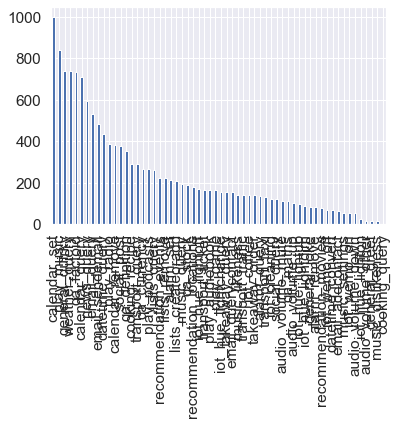

In [185]:
data['scenario_intent'].value_counts().plot.bar()

In [186]:
data['scenario_intent'].value_counts()

calendar_set                999
play_music                  841
general_quirky              740
weather_query               739
qa_factoid                  736
calendar_query              712
news_query                  592
email_query                 531
email_sendemail             482
datetime_query              434
play_radio                  385
calendar_remove             383
social_post                 379
qa_definition               353
cooking_recipe              289
transport_query             288
qa_currency                 265
play_podcasts               265
lists_query                 260
recommendation_events       225
lists_remove                224
alarm_set                   214
lists_createoradd           206
music_query                 196
qa_stock                    189
recommendation_locations    179
iot_hue_lightoff            172
transport_ticket            167
play_audiobook              167
play_game                   164
iot_hue_lightchange         157
takeaway

In [187]:
data = data.drop(data[data['scenario_intent'] == 'calendar_set'].sample(frac=0.60).index)
data = data.drop(data[data['scenario_intent'] == 'play_music'].sample(frac=0.60).index)
data = data.drop(data[data['scenario_intent'] == 'general_quirky'].sample(frac=0.50).index)
data = data.drop(data[data['scenario_intent'] == 'weather_query'].sample(frac=0.50).index)
data = data.drop(data[data['scenario_intent'] == 'qa_factoid'].sample(frac=0.50).index)
data = data.drop(data[data['scenario_intent'] == 'calendar_query'].sample(frac=0.50).index)
data = data.drop(data[data['scenario_intent'] == 'news_query'].sample(frac=0.50).index)
data = data.drop(data[data['scenario_intent'] == 'email_query'].sample(frac=0.30).index)
data = data.drop(data[data['scenario_intent'] == 'email_sendemail'].sample(frac=0.30).index)
data = data.drop(data[data['scenario_intent'] == 'datetime_query'].sample(frac=0.30).index)
data = data.drop(data[data['scenario_intent'] == 'play_radio'].sample(frac=0.20).index)



In [188]:
data['scenario_intent'].value_counts()

calendar_set                400
calendar_remove             383
social_post                 379
email_query                 372
general_quirky              370
weather_query               369
qa_factoid                  368
calendar_query              356
qa_definition               353
email_sendemail             337
play_music                  336
play_radio                  308
datetime_query              304
news_query                  296
cooking_recipe              289
transport_query             288
qa_currency                 265
play_podcasts               265
lists_query                 260
recommendation_events       225
lists_remove                224
alarm_set                   214
lists_createoradd           206
music_query                 196
qa_stock                    189
recommendation_locations    179
iot_hue_lightoff            172
play_audiobook              167
transport_ticket            167
play_game                   164
iot_hue_lightchange         157
takeaway

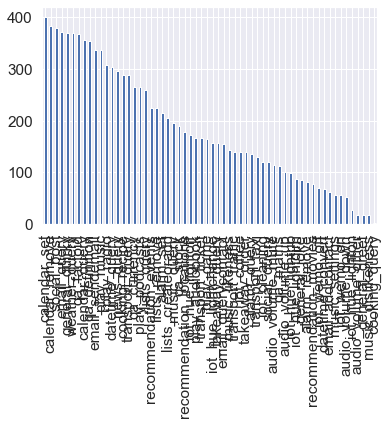

In [249]:
data['scenario_intent'].value_counts().plot.bar()

In [250]:
data['scenario_intent'].value_counts()< 60

calendar_set                False
calendar_remove             False
social_post                 False
email_query                 False
general_quirky              False
weather_query               False
qa_factoid                  False
calendar_query              False
qa_definition               False
email_sendemail             False
play_music                  False
play_radio                  False
datetime_query              False
news_query                  False
cooking_recipe              False
transport_query             False
qa_currency                 False
play_podcasts               False
lists_query                 False
recommendation_events       False
lists_remove                False
alarm_set                   False
lists_createoradd           False
music_query                 False
qa_stock                    False
recommendation_locations    False
iot_hue_lightoff            False
play_audiobook              False
transport_ticket            False
play_game     

In [190]:
data

,question,scenario,intent,scenario_intent
0,have i got any alarms set,alarm,query,alarm_query
4,if there any alarm is set then let me know,alarm,query,alarm_query
5,get me an uber please,transport,taxi,transport_taxi
6,should i go through the valley or on the ten t...,transport,traffic,transport_traffic
8,what's new on my facebook account,social,query,social_query
...,...,...,...,...
14507,give me the idea of current traffic condition,transport,traffic,transport_traffic
14508,hoover the carpets around,iot,cleaning,iot_cleaning
14509,i want to mute the speaker,audio,volume_mute,audio_volume_mute
14510,are there any alarms set what are they,alarm,query,alarm_query


In [191]:
question = list(data["question"])
scenario_intent= data["scenario_intent"]
unique_scen_int=list(set(scenario_intent))

In [192]:
len(unique_scen_int)

60

In [193]:
print(question[:5])

['have i got any alarms set', 'if there any alarm is set then let me know', 'get me an uber please', 'should i go through the valley or on the ten to get to westwood', "what's new on my facebook account"]


In [194]:

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ej036t\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ej036t\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [195]:

#define stemmer
stemmer = LancasterStemmer()

In [196]:
def cleaning(question):
  words = []
  for q in question:
    clean = re.sub(r'[^ a-z A-Z 0-9]', " ", q)
    w = word_tokenize(clean)
    #stemming
    words.append([i.lower() for i in w])
    
  return words

In [197]:
cleaned_words = cleaning(question)
print(len(cleaned_words))
print(cleaned_words[:2])

11139
[['have', 'i', 'got', 'any', 'alarms', 'set'], ['if', 'there', 'any', 'alarm', 'is', 'set', 'then', 'let', 'me', 'know']]


In [198]:
def create_tokenizer(words, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~'):
  token = Tokenizer(filters = filters)
  token.fit_on_texts(words)
  return token

In [199]:

def max_length(words):
  return(len(max(words, key = len)))

In [200]:
word_tokenizer = create_tokenizer(cleaned_words)
vocab_size = len(word_tokenizer.word_index) + 1
max_length = max_length(cleaned_words)

print("Vocab Size = %d and Maximum length = %d" % (vocab_size, max_length))

Vocab Size = 5541 and Maximum length = 39


In [201]:
def encoding_doc(token, words):
  return(token.texts_to_sequences(words))

In [202]:
encoded_doc = encoding_doc(word_tokenizer, cleaned_words)

In [203]:
def padding_doc(encoded_doc, max_length):
  return(pad_sequences(encoded_doc, maxlen = max_length, padding = "post"))

In [204]:
padded_doc = padding_doc(encoded_doc, max_length)

In [205]:
padded_doc[:5]


array([[  31,    6,  300,   36,  132,   34,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [ 127,   58,   36,   43,    4,   34,  666,  117,    5,  105,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [  63,    5,   37,  243,   13,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [ 148,    6,  100,  720,    1, 1867,  186,   11,    1,  124,    2,
          63,    2, 2686,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  

In [206]:
print("Shape of padded docs = ",padded_doc.shape)

Shape of padded docs =  (11139, 39)


In [207]:
#tokenizer with filter changed
output_tokenizer = create_tokenizer(unique_scen_int, filters = '!"#$%&()*+/:,;<=>?@[\]^`{|}~')

In [208]:
output_tokenizer.word_index

{'audio_volume_mute': 1,
 'music_settings': 2,
 'weather_query': 3,
 'social_post': 4,
 'iot_cleaning': 5,
 'iot_hue_lightup': 6,
 'email_query': 7,
 'qa_stock': 8,
 'email_addcontact': 9,
 'takeaway_order': 10,
 'iot_wemo_off': 11,
 'transport_query': 12,
 'qa_maths': 13,
 'calendar_set': 14,
 'qa_definition': 15,
 'email_sendemail': 16,
 'alarm_query': 17,
 'alarm_set': 18,
 'calendar_remove': 19,
 'play_music': 20,
 'qa_factoid': 21,
 'qa_currency': 22,
 'audio_volume_other': 23,
 'music_query': 24,
 'lists_query': 25,
 'recommendation_events': 26,
 'takeaway_query': 27,
 'cooking_recipe': 28,
 'recommendation_movies': 29,
 'general_greet': 30,
 'iot_hue_lighton': 31,
 'iot_hue_lightoff': 32,
 'datetime_convert': 33,
 'transport_traffic': 34,
 'iot_hue_lightchange': 35,
 'play_game': 36,
 'general_joke': 37,
 'general_quirky': 38,
 'cooking_query': 39,
 'lists_remove': 40,
 'email_querycontact': 41,
 'iot_coffee': 42,
 'recommendation_locations': 43,
 'datetime_query': 44,
 'play_au

In [209]:
encoded_output = encoding_doc(output_tokenizer, scenario_intent)

In [210]:
encoded_output = np.array(encoded_output).reshape(len(encoded_output), 1)

In [211]:
encoded_output.shape

(11139, 1)

In [212]:
def one_hot(encode):
  o = OneHotEncoder(sparse = False)
  return(o.fit_transform(encode))

In [213]:
output_one_hot = one_hot(encoded_output)

C:\Users\ej036t\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [214]:
output_one_hot.shape

(11139, 60)

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
train_X, val_X, train_Y, val_Y = train_test_split(padded_doc, output_one_hot, shuffle = True, test_size = 0.2)

In [253]:
print("Shape of train_X = %s and train_Y = %s" % (train_X.shape, train_Y.shape))
print("Shape of val_X = %s and val_Y = %s" % (val_X.shape, val_Y.shape))

Shape of train_X = (8911, 39) and train_Y = (8911, 60)
Shape of val_X = (2228, 39) and val_Y = (2228, 60)


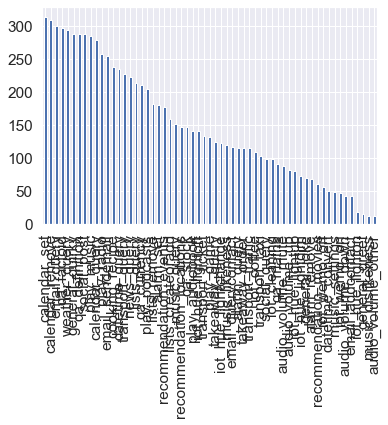

In [252]:
data['scenario_intent'][:8911].value_counts().plot.bar()

In [256]:
# import the Random Over Sampler object.
from imblearn.over_sampling import RandomOverSampler

# create the object.
over_sampler = RandomOverSampler()

# fit the object to the training data.
x_train_over, y_train_over = over_sampler.fit_sample(train_X, train_Y)

In [257]:
print("Shape of train_X = %s and train_Y = %s" % (x_train_over.shape, y_train_over.shape))

Shape of train_X = (19740, 39) and train_Y = (19740, 60)


In [261]:
def create_model(vocab_size, max_length):
  model = Sequential()
  model.add(Embedding(vocab_size,1000, input_length = max_length, trainable = False))
  model.add(Bidirectional(LSTM(200)))
# model.add(LSTM(200))
  model.add(Dense(100,activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(60, activation = "softmax"))
  
  return model

In [262]:

model = create_model(vocab_size, max_length)

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 39, 1000)          5541000   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 400)               1921600   
_________________________________________________________________
dense_17 (Dense)             (None, 100)               40100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 60)                6060      
Total params: 7,508,760
Trainable params: 1,967,760
Non-trainable params: 5,541,000
_________________________________________________________________


In [263]:
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

hist = model.fit(x_train_over, y_train_over, epochs = 20, batch_size = 300, validation_data = (val_X, val_Y), callbacks = [checkpoint])

Train on 19740 samples, validate on 2228 samples
Epoch 1/20
19740/19740 [==============================] - 79s 4ms/step - loss: 3.9722 - accuracy: 0.0511 - val_loss: 3.7553 - val_accuracy: 0.1028

Epoch 00001: val_loss improved from inf to 3.75534, saving model to model.h5
Epoch 2/20
19740/19740 [==============================] - 86s 4ms/step - loss: 3.1264 - accuracy: 0.2158 - val_loss: 2.5144 - val_accuracy: 0.4039

Epoch 00002: val_loss improved from 3.75534 to 2.51444, saving model to model.h5
Epoch 3/20
19740/19740 [==============================] - 80s 4ms/step - loss: 2.1521 - accuracy: 0.4328 - val_loss: 1.8702 - val_accuracy: 0.5444

Epoch 00003: val_loss improved from 2.51444 to 1.87023, saving model to model.h5
Epoch 4/20
19740/19740 [==============================] - 79s 4ms/step - loss: 1.6084 - accuracy: 0.5713 - val_loss: 1.5013 - val_accuracy: 0.6351

Epoch 00004: val_loss improved from 1.87023 to 1.50131, saving model to model.h5
Epoch 5/20
19740/19740 [===============

KeyboardInterrupt: 

## Prediction


In [264]:
import pandas as pd

In [284]:
test_test = pd.read_csv("test_dataset_intent_to_share.csv", sep = ",")
test_test

,Unnamed: 0,question
0,0,delete item on list
1,1,what brand hair spray does donald trump use
2,2,play the song by michael jackson
3,3,what events are near me
4,4,can you reserve a ticket to grand rapids by train
...,...,...
6216,6216,tweet consumer service that the goods are of l...
6217,6217,can you tell me what a grommet is
6218,6218,start words with friends
6219,6219,please read me headlines from washington post


In [285]:

test_test = test_test["question"]


In [287]:
model = load_model("model.h5")

In [288]:
def predictions(text):
  clean = re.sub(r'[^ a-z A-Z 0-9]', " ", text)
  test_word = word_tokenize(clean)
  test_word = [w.lower() for w in test_word]
  test_ls = word_tokenizer.texts_to_sequences(test_word)
  print(test_word)
  #Check for unknown words
  if [] in test_ls:
    test_ls = list(filter(None, test_ls))
    
  test_ls = np.array(test_ls).reshape(1, len(test_ls))
 
  x = padding_doc(test_ls, max_length)
  
  pred = model.predict_proba(x)
  
  
  return pred

In [349]:
def get_final_output(pred, classes):
  predictions = pred[0]
 
  classes = np.array(classes)
  ids = np.argsort(-predictions)
  classes = classes[ids]
  predictions = -np.sort(-predictions)
 
  for i in range(pred.shape[1]):
    print("%s has confidence = %s" % (classes[i], (predictions[i])))

In [359]:
text = test_test[6000]
pred = predictions(text)
get_final_output(pred, unique_scen_int)

['what', 'is', 'the', 'date', 'and', 'time', 'for', 'today']
datetime_query has confidence = 0.9836469
datetime_convert has confidence = 0.010745879
weather_query has confidence = 0.0021022882
qa_stock has confidence = 0.0011802933
calendar_query has confidence = 0.0011612036
general_quirky has confidence = 0.00044787204
email_query has confidence = 0.00026959
qa_factoid has confidence = 0.00021377763
alarm_query has confidence = 0.0001262789
qa_currency has confidence = 2.2037371e-05
email_querycontact has confidence = 1.955291e-05
transport_query has confidence = 1.6498681e-05
transport_traffic has confidence = 1.1560248e-05
qa_definition has confidence = 6.337876e-06
alarm_set has confidence = 6.314944e-06
news_query has confidence = 3.4324687e-06
recommendation_events has confidence = 3.4118232e-06
audio_volume_mute has confidence = 2.871953e-06
play_radio has confidence = 1.9138176e-06
music_query has confidence = 1.4628184e-06
lists_query has confidence = 1.141946e-06
iot_hue_lig